In [1]:
import math
import os
import pickle

import matplotlib.pyplot as plt
import overpy
from geopy.distance import geodesic

In [10]:
# Function to get coastline data from OpenStreetMap
def get_coastline_points(relation_id=9740744, file_name="data/coastline_points.pkl"):
    # Check if the file with coastline points already exists
    if os.path.exists(file_name):
        print(f"Loading coastline points from {file_name}")
        with open(file_name, "rb") as f:
            coastline_points = pickle.load(f)
    else:
        print("Fetching coastline points from OpenStreetMap...")
        api = overpy.Overpass()
        query = f"""
        [out:json];
        relation({relation_id});
        way(r);
        (._;>;);
        out body;
        """
        result = api.query(query)

        coastline_points = list(
            map(
                lambda way: map(
                    lambda node: (float(node.lat), float(node.lon)),
                    way.nodes,
                ),
                result.ways,
            ),
        )

        # Save the coastline points to a file for future use
        with open(file_name, "wb") as f:
            pickle.dump(coastline_points, f)

    return coastline_points

In [8]:
# Approximate threshold for filtering based on coordinate differences
def quick_filter_by_lat_lon(
    restaurant_location, coastline_point, lat_threshold=0.0027, lon_threshold=0.0027
):
    lat_diff = abs(restaurant_location[0] - coastline_point[0])
    lon_diff = abs(restaurant_location[1] - coastline_point[1])

    # Convert longitude threshold to account for latitude difference
    lon_adjusted_threshold = lon_threshold * math.cos(
        math.radians(restaurant_location[0])
    )

    # Return True if both latitude and longitude differences are within the threshold
    return lat_diff <= lat_threshold and lon_diff <= lon_adjusted_threshold


# Function to calculate distance in meters between two geographical points
def haversine_distance(point1, point2):
    return geodesic(point1, point2).meters

In [12]:
coastline_points = get_coastline_points()

Fetching coastline points from OpenStreetMap...


FileNotFoundError: [Errno 2] No such file or directory: 'data/coastline_points.pkl'

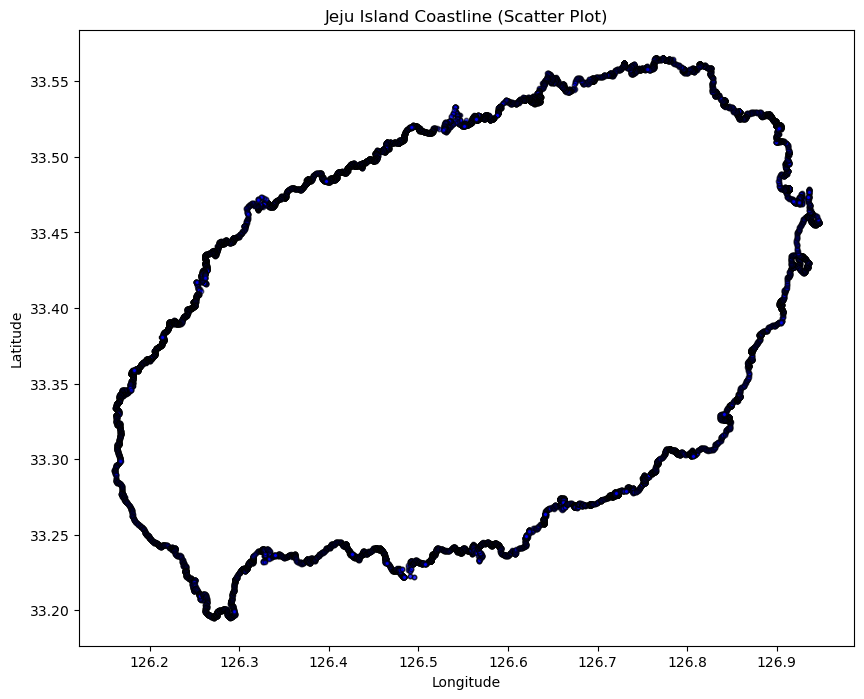

In [4]:
lons, lats = zip(*coastline_points)

plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, c="b", s=10, alpha=0.6, edgecolors="k")
plt.title("Jeju Island Coastline (Scatter Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()